70000


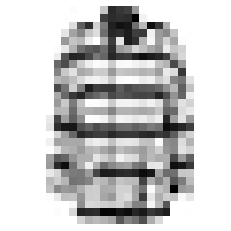

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
Epoch 0 cost:  9.990735441552415
Epoch 100 cost:  0.9483808670685154
Epoch 200 cost:  0.7967245511928275
Epoch 300 cost:  0.7241546753117123
Epoch 400 cost:  0.679970144201329
Epoch 500 cost:  0.6493260322568961
Epoch 600 cost:  0.6261850200327886
Epoch 700 cost:  0.6077483856736959
Epoch 800 cost:  0.5924867018550029
Epoch 900 cost:  0.5794712481653643
Final cost: 0.5682830176778694


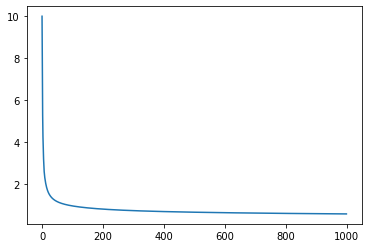

[[781   9  20  37   0   1 170   0   6   1]
 [  8 929   2  25   4   1   5   0   3   0]
 [ 25  14 653  17 123   0 134   0  12   2]
 [ 75  35  12 816  35   0  57   0  10   0]
 [ 11   8 159  42 700   1 151   0   6   0]
 [  5   0   1   2   1 851   1  58   9  25]
 [ 75   3 136  50 127   2 445   0  21   1]
 [  0   0   0   0   0  77   0 860   8  47]
 [ 20   2  16  11   9  23  36   1 922   2]
 [  0   0   1   0   1  44   1  81   3 922]]
              precision    recall  f1-score   support

           0       0.78      0.76      0.77      1025
           1       0.93      0.95      0.94       977
           2       0.65      0.67      0.66       980
           3       0.82      0.78      0.80      1040
           4       0.70      0.65      0.67      1078
           5       0.85      0.89      0.87       953
           6       0.45      0.52      0.48       860
           7       0.86      0.87      0.86       992
           8       0.92      0.88      0.90      1042
           9       0.92     

In [2]:
from sklearn.datasets import fetch_openml
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import average_precision_score
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

X, y = fetch_openml('Fashion-MNIST', version=1, return_X_y=True)
X = X / 255

digits = 10
points = y.shape[0]
print(points)

y = y.reshape(1, points)

Y_new = np.eye(digits)[y.astype('int32')]
Y_new = Y_new.T.reshape(digits, points)

maxi = 60000
max_t = X.shape[0] - maxi

X_train, X_test = X[:maxi].T, X[maxi:].T
Y_train, Y_test = Y_new[:,:maxi], Y_new[:,maxi:]

shuffle_index = np.random.permutation(maxi)
X_train, Y_train = X_train[:, shuffle_index], Y_train[:, shuffle_index]

i = 12
plt.imshow(X_train[:,i].reshape(28,28), cmap = matplotlib.cm.binary)
plt.axis("off")
plt.show()
print(Y_train[:,i])

def cross_entropy_loss(Y, Y_hat):

    L_sum = np.sum(np.multiply(Y, np.log(Y_hat)))
    m = Y.shape[1]
    L = -(1/m) * L_sum

    return L

def sigmoid(z):
    s = 1 / (1 + np.exp(-z))
    return s

num_x = X_train.shape[0]
num_h = 64
learning_rate = 0.5

W1 = np.random.randn(num_h, num_x)
b1 = np.zeros((num_h, 1))
W2 = np.random.randn(digits, num_h)
b2 = np.zeros((digits, 1))

X = X_train
Y = Y_train

losstrack = list()

for i in range(1000):

    Z1 = np.matmul(W1,X) + b1
    A1 = sigmoid(Z1)
    Z2 = np.matmul(W2,A1) + b2
    A2 = np.exp(Z2) / np.sum(np.exp(Z2), axis=0)

    cost = cross_entropy_loss(Y, A2)
    losstrack.append(np.squeeze(cost))

    dZ2 = A2-Y
    dW2 = (1./maxi) * np.matmul(dZ2, A1.T)
    db2 = (1./maxi) * np.sum(dZ2, axis=1, keepdims=True)

    dA1 = np.matmul(W2.T, dZ2)
    dZ1 = dA1 * sigmoid(Z1) * (1 - sigmoid(Z1))
    dW1 = (1./maxi) * np.matmul(dZ1, X.T)
    db1 = (1./maxi) * np.sum(dZ1, axis=1, keepdims=True)

    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1

    if (i % 100 == 0):
        print("Epoch", i, "cost: ", cost)

print("Final cost:", cost)

plt.plot(losstrack)
plt.show()

Z1 = np.matmul(W1, X_test) + b1
A1 = sigmoid(Z1)
Z2 = np.matmul(W2, A1) + b2
A2 = np.exp(Z2) / np.sum(np.exp(Z2), axis=0)

predictions = np.argmax(A2, axis=0)
labels = np.argmax(Y_test, axis=0)
predictions = np.argmax(A2, axis=0)
labels = np.argmax(Y_test, axis=0)

print(confusion_matrix(predictions, labels))
print(classification_report(predictions, labels))